<a href="https://colab.research.google.com/github/figoalsistn19/TenunaraProject/blob/master/Tenunara_4_Class_InceptionV3_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tenun Image Classification (Tenunara)

##Import Packages

In [3]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.1 MB/s 
     |████████████████████████████████| 40 kB 4.7 MB/s 
     |████████████████████████████████| 462 kB 11.2 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import tensorflow as tf
print('TensorFlow :', tf.__version__)

TensorFlow : 2.8.0


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras_preprocessing import image
from shutil import copyfile
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os

##Load Data

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [11]:
try:
    os.mkdir('/content/gdrive/MyDrive/Capstone/')
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/', 'training'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/', 'testing'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Gringsing'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Palembang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Tenun Rangrang NTB'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Ulos Ragihotang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Gringsing'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Palembang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Tenun Rangrang NTB'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Ulos Ragihotang'))
except OSError:
    pass

In [12]:
print('Gringsing:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Gringsing/')))
print('Palembang:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Palembang/')))
print('Tenun Rangrang NTB:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Tenun Rangrang NTB/')))
print('Ulos Ragihotang:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Ulos Ragihotang/')))


Gringsing: 27
Palembang: 52
Tenun Rangrang NTB: 121
Ulos Ragihotang: 110


##Preprocessing Data

In [16]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    # YOUR CODE STARTS HERE
    if not os.path.exists(TRAINING): 
        os.makedirs(TRAINING) 
                
    if not os.path.exists(TESTING): 
        os.makedirs(TESTING) 

    if not os.path.exists(VALIDATION): 
        os.makedirs(VALIDATION)

    file_names = os.listdir(SOURCE) 
    file_number = len(file_names) 

    for index, file in enumerate(file_names): 
        if index < SPLIT_SIZE * file_number: 
          if index < 0.8 * file_number:
            copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
          else:
            copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
        else: 
            copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file)) 

GRINGSING_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Gringsing/"
PALEMBANG_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Palembang/"
RANGRANG_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Tenun Rangrang NTB/"
RAGIHOTANG_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Ulos Ragihotang/"

TRAINING_GRINGSING_DIR = "/content/gdrive/MyDrive/Capstone/training/Gringsing/"
TRAINING_PALEMBANG_DIR = "/content/gdrive/MyDrive/Capstone/training/Palembang/"
TRAINING_RANGRANG_DIR = "/content/gdrive/MyDrive/Capstone/training/Tenun Rangrang NTB/"
TRAINING_RAGIHOTANG_DIR = "/content/gdrive/MyDrive/Capstone/training/Ulos Ragihotang/"

TESTING_GRINGSING_DIR = "/content/gdrive/MyDrive/Capstone/testing/Gringsing/"
TESTING_PALEMBANG_DIR = "/content/gdrive/MyDrive/Capstone/testing/Palembang/"
TESTING_RANGRANG_DIR = "/content/gdrive/MyDrive/Capstone/testing/Tenun Rangrang NTB/"
TESTING_RAGIHOTANG_DIR = "/content/gdrive/MyDrive/Capstone/testing/Ulos Ragihotang/"

VALIDATION_GRINGSING_DIR = "/content/gdrive/MyDrive/Capstone/validation/Gringsing/"
VALIDATION_PALEMBANG_DIR = "/content/gdrive/MyDrive/Capstone/validation/Palembang/"
VALIDATION_RANGRANG_DIR = "/content/gdrive/MyDrive/Capstone/validation/Tenun Rangrang NTB/"
VALIDATION_RAGIHOTANG_DIR = "/content/gdrive/MyDrive/Capstone/validation/Ulos Ragihotang/"


split_size = .9
split_data(GRINGSING_SOURCE_DIR, TRAINING_GRINGSING_DIR, TESTING_GRINGSING_DIR, VALIDATION_GRINGSING_DIR, split_size)
split_data(PALEMBANG_SOURCE_DIR, TRAINING_PALEMBANG_DIR, TESTING_PALEMBANG_DIR, VALIDATION_PALEMBANG_DIR, split_size)
split_data(RANGRANG_SOURCE_DIR, TRAINING_RANGRANG_DIR, TESTING_RANGRANG_DIR, VALIDATION_RANGRANG_DIR, split_size)
split_data(RAGIHOTANG_SOURCE_DIR, TRAINING_RAGIHOTANG_DIR, TESTING_RAGIHOTANG_DIR, VALIDATION_RAGIHOTANG_DIR, split_size)

In [17]:
train_gringsing = os.listdir(TRAINING_GRINGSING_DIR)
train_palembang = os.listdir(TRAINING_PALEMBANG_DIR)
train_rangrang = os.listdir(TRAINING_RANGRANG_DIR)
train_ragihotang = os.listdir(TRAINING_RAGIHOTANG_DIR)

test_gringsing = os.listdir(TESTING_GRINGSING_DIR)
test_palembang = os.listdir(TESTING_PALEMBANG_DIR)
test_rangrang = os.listdir(TESTING_RANGRANG_DIR)
test_ragihotang = os.listdir(TESTING_RAGIHOTANG_DIR)

val_gringsing = os.listdir(VALIDATION_GRINGSING_DIR)
val_palembang = os.listdir(VALIDATION_PALEMBANG_DIR)
val_rangrang = os.listdir(VALIDATION_RANGRANG_DIR)
val_ragihotang = os.listdir(VALIDATION_RAGIHOTANG_DIR)

print("Training")
print('gringsing :', len(train_gringsing))
print('palembang :', len(train_palembang))
print('rangrang :', len(train_rangrang))
print('ragihotang :', len(train_ragihotang))

print("\nTesting")
print('gringsing :', len(test_gringsing))
print('palembang :', len(test_palembang))
print('rangrang :', len(test_rangrang))
print('ragihotang :', len(test_ragihotang))

print("\nValidation")
print('gringsing :', len(val_gringsing))
print('palembang :', len(val_palembang))
print('rangrang :', len(val_rangrang))
print('ragihotang :', len(val_ragihotang))

Training
gringsing : 22
palembang : 42
rangrang : 97
ragihotang : 88

Testing
gringsing : 2
palembang : 5
rangrang : 12
ragihotang : 11

Validation
gringsing : 3
palembang : 5
rangrang : 12
ragihotang : 11


In [18]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

TRAINING_DIR = '/content/gdrive/MyDrive/Capstone/training/'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = '/content/gdrive/MyDrive/Capstone/testing/'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)

VALIDATION_DIR = '/content/gdrive/MyDrive/Capstone/validation/'
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=True
)

Found 249 images belonging to 4 classes.
Found 30 images belonging to 4 classes.
Found 31 images belonging to 4 classes.


In [19]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 249 files belonging to 4 classes.


In [20]:
class_names = train_dataset.class_names

print(class_names)

['Gringsing', 'Palembang', 'Tenun Rangrang NTB', 'Ulos Ragihotang']


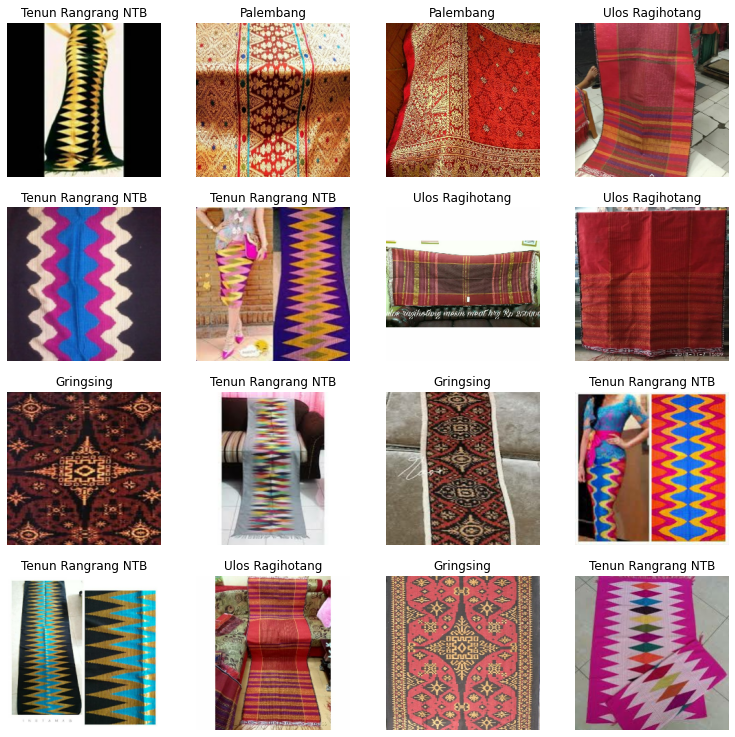

In [21]:
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

##Model Achitecture

###Simple CNN

In [26]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE + (3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Using dropouts
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

####Compile and Fit Model

In [27]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    verbose = 1,
                    validation_steps=len(val_generator))

Epoch 1/10
8/8 [==============================] - 32s 4s/step - loss: 1.3494 - accuracy: 0.3815 - val_loss: 1.1486 - val_accuracy: 0.5806
Epoch 2/10
8/8 [==============================] - 32s 4s/step - loss: 1.0985 - accuracy: 0.6265 - val_loss: 0.9061 - val_accuracy: 0.6774
Epoch 3/10
8/8 [==============================] - 30s 4s/step - loss: 0.9839 - accuracy: 0.6426 - val_loss: 0.7130 - val_accuracy: 0.8387
Epoch 4/10
8/8 [==============================] - 30s 4s/step - loss: 0.8620 - accuracy: 0.6707 - val_loss: 0.5754 - val_accuracy: 0.8387
Epoch 5/10
8/8 [==============================] - 30s 4s/step - loss: 0.8601 - accuracy: 0.6827 - val_loss: 0.5339 - val_accuracy: 0.8065
Epoch 6/10
8/8 [==============================] - 30s 4s/step - loss: 0.7226 - accuracy: 0.7309 - val_loss: 0.5118 - val_accuracy: 0.7742
Epoch 7/10
8/8 [==============================] - 30s 4s/step - loss: 0.7004 - accuracy: 0.7430 - val_loss: 0.3636 - val_accuracy: 0.8387
Epoch 8/10
8/8 [==================

####Accuracy and Loss Plot

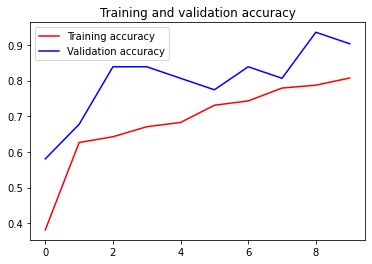

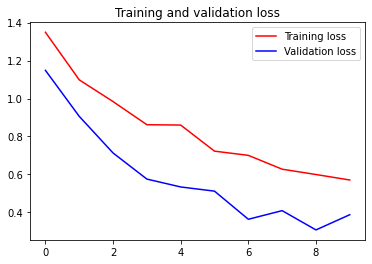

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

###InceptionV3

In [30]:
pretrained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [31]:
for layer in pretrained_model.layers:
    layer.trainable = False
    
# Print the model summary
#pretrained_model.summary()

In [32]:
last_layer = pretrained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [37]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(4, activation='softmax')(x)

####Compile and Fit Model

In [38]:
model2 = Model(pretrained_model.input, x)

In [39]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_6[0][0]']               
 alization)                     )                                                           

In [43]:
history = model2.fit(train_generator, 
                     epochs=10, 
                     steps_per_epoch=10, 
                     validation_data=val_generator, 
                     validation_steps=3,
                     verbose=1)

Epoch 1/10
10/10 [==============================] - 28s 3s/step - loss: 0.2832 - accuracy: 0.9116 - val_loss: 0.0261 - val_accuracy: 1.0000


####Accuracy and Loss Plot

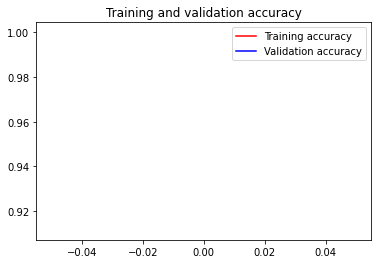

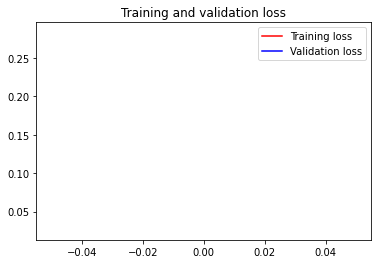

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
loss = model2.evaluate(test_generator, steps=10)

10/10 [==============================] - 3s 3ms/step - loss: 0.2698 - accuracy: 0.8667


Saving palembang2.jpg to palembang2.jpg


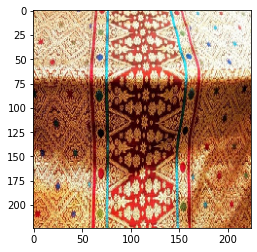

Gringsing: 0.27%
Palembang: 99.73%
Tenun Rangrang NTB: 0.00%
Ulos Ragihotang: 0.00%


In [46]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model2.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

###Xception

In [47]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception

In [61]:
base_model = Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False
  )

base_model.trainable = False
# for layer in base_model.layers:
#   layer.trainable = False

base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [62]:
# last_output = base_model.output.shape
# print("Last Output :", last_output)

# x = Flatten()(last_output)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# output = Dense(1, activation='sigmoid')(x)


inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
# outputs = Dense(1, activation='sigmoid')(x)
outputs = Dense(4, activation='softmax')(x)

####Compile and Fit Model

In [63]:
model = Model(inputs, outputs)

model.summary()

# model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_7 (Flatten)         (None, 100352)            0         
                                                                 
 dense_14 (Dense)            (None, 1024)              102761472 
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 4)                 4100      
                                                                 
Total params: 123,627,052
Trainable params: 102,765,572
Non

In [64]:
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=val_generator,
                    verbose = 1)

Epoch 1/25
8/8 [==============================] - 65s 8s/step - loss: 8.5351 - acc: 0.5743 - val_loss: 1.5953 - val_acc: 0.7419
Epoch 2/25
8/8 [==============================] - 62s 8s/step - loss: 0.4710 - acc: 0.8715 - val_loss: 0.5406 - val_acc: 0.9032
Epoch 3/25
8/8 [==============================] - 65s 8s/step - loss: 0.7461 - acc: 0.8554 - val_loss: 0.2680 - val_acc: 0.8710
Epoch 4/25
8/8 [==============================] - 60s 8s/step - loss: 0.2523 - acc: 0.9398 - val_loss: 0.8178 - val_acc: 0.8065
Epoch 5/25
8/8 [==============================] - 60s 7s/step - loss: 1.1713 - acc: 0.8353 - val_loss: 0.1265 - val_acc: 0.9032
Epoch 6/25
8/8 [==============================] - 60s 8s/step - loss: 0.0656 - acc: 0.9799 - val_loss: 0.0569 - val_acc: 0.9677
Epoch 7/25
8/8 [==============================] - 60s 7s/step - loss: 0.3999 - acc: 0.9076 - val_loss: 0.2629 - val_acc: 0.9032
Epoch 8/25
8/8 [==============================] - 60s 7s/step - loss: 0.4100 - acc: 0.9036 - val_loss: 0

####Accuracy and Loss Plot

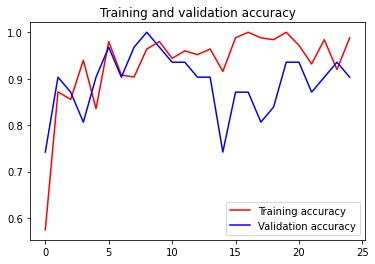

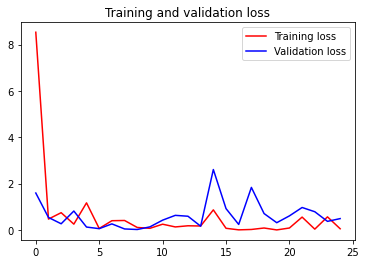

In [65]:
#----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot  ( epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
# plt.title('Training accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss')
# plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} '/content/drive/MyDrive/best_model_fix'